In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On charge les donn√©es dans un dataframe "df"
# Avec 'event_id_cnty' comme index
df = pd.read_csv('terrorisme_sahel.csv', index_col='event_id_cnty')


############################################################
## FILTRES SUR LES COLONNES

# On r√©cup√®re ici seulement les √©v√®nements qui nous int√©ressent
events_filter = ['Battles', 'Explosions/Remote violence', 'Violence against civilians', 'Strategic developments']
df = df[df['event_type'].isin(events_filter)]


############################################################
## TRANSFORMATION DES COLONNES

# On transforme la colonne "event_date" en datetime pour la manipuler plus facilement
df['event_date'] = pd.to_datetime(df['event_date'])
# On cr√©e la colonne "month" en utilisant l'attribut month de datetime
df['month'] = df['event_date'].dt.month
# On ajoute la colonne juste apr√®s "year"
df.insert(3, 'month', df.pop('month'))


############################################################
## CREATION DE NOUVELLES COLONNES
# On cr√©e une liste contenant les organisations terroristes
terrorist_groups = ['Ansaroul Islam',
                       'AQIM: Al Qaeda in the Islamic Maghreb',
                       'Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad',
                       'Islamic State (Sahel)',
                       'Islamic State (West Africa)',
                       'Islamic State (West Africa) - Lake Chad Faction',
                       'Islamic State (West Africa) - Lake Chad Faction and/or Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad',
                       'Islamic State (West Africa) and/or Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad',
                       'JNIM: Group for Support of Islam and Muslims',
                       'JNIM: Group for Support of Islam and Muslims and/or Islamic State (Sahel)',
                       'Katiba Gourma',
                       'Katiba Macina',
                       'Katiba Serma']

# On cr√©e une fonction pour v√©rifier si un acteur est une organisation terroriste
def is_terrorist_actor(actor):
    return actor in terrorist_groups

# Puis on l'applique √† chaque ligne du DataFrame et on cr√©e une nouvelle colonne
# qui indique si pour un √©v√®nement l'un des acteurs est une organisation terrorist
df['is_terrorist_related'] = (df['actor1'].apply(is_terrorist_actor) |
                             df['assoc_actor_1'].apply(is_terrorist_actor) |
                             df['actor2'].apply(is_terrorist_actor) |
                             df['assoc_actor_2'].apply(is_terrorist_actor)).astype(int)

# On ajoute la colonne juste apr√®s "interaction"
df.insert(17, 'is_terrorist_related', df.pop('is_terrorist_related'))

# On cr√©e une liste contenant les pmc russes
pmc_groups = ['Wagner Group']

# On cr√©e une fonction pour v√©rifier si un acteur est une pmc russe
def is_pmc_actor(actor):
    return actor in pmc_groups

# Puis on l'applique √† chaque ligne du DataFrame et on cr√©e une nouvelle colonne
# qui indique si pour un √©v√®nement l'un des acteurs est une pmc russe
df['is_pmc_related'] = (df['actor1'].apply(is_pmc_actor) |
                             df['assoc_actor_1'].apply(is_pmc_actor) |
                             df['actor2'].apply(is_pmc_actor) |
                             df['assoc_actor_2'].apply(is_pmc_actor)).astype(int)

# On ajoute la colonne juste apr√®s "interaction"
df.insert(18, 'is_pmc_related', df.pop('is_pmc_related'))

# On ajoute une colonne qui permet d'associer chaque organisation terroriste
# √† son organisation m√®re
#terrorist_org_filiation = {
#    'Ansaroul Islam': 'Al Qaida',
#    'AQIM: Al Qaeda in the Islamic Maghreb': 'Al Qaida',
#    'Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad': 'Etat Islamique',
#    'Islamic State (Sahel)' : 'Etat Islamique',
#   'Islamic State (West Africa)': 'Etat Islamique',
#    'Islamic State (West Africa) - Lake Chad Faction': 'Etat Islamique',
#    'Islamic State (West Africa) - Lake Chad Faction and/or Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad': 'Etat Islamique',
#    'Islamic State (West Africa) and/or Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad': 'Etat Islamique',
#    'JNIM: Group for Support of Islam and Muslims': 'Al Qaida',
#    'JNIM: Group for Support of Islam and Muslims and/or Islamic State (Sahel)': 'Al Qaida',
#    'Katiba Gourma': 'Al Qaida',
#    'Katiba Macina': 'Al Qaida',
 #   'Katiba Serma': 'Al Qaida'
#}

# On cr√©e une fonction de mapping pour associer les valeurs du dictionnaire aux acteurs
#def map_filiation(row):
 #   for actor in ['actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2']:
#        if row[actor] in terrorist_org_filiation:
#            return terrorist_org_filiation[row[actor]]
#    return "Aucune"

# Puis on l'applique √† chaque ligne du DataFrame, et on stocke les valeurs
# dans une novuelle colonne 'terrorist_org_filiation'
#df['terrorist_org_filiation'] = df.apply(map_filiation, axis=1)


############################################################
## NETTOYAGE DES COLONNES

# On remplace dans la colonne 'civilian_targeting' les valeurs par des bool√©ens
df['civilian_targeting'] = df['civilian_targeting'].replace('Civilian targeting', 1)
df['civilian_targeting'] = df['civilian_targeting'].fillna(0)


############################################################
## SUPPRESSION DES COLONNES

# On supprime les colonnes qui nous serons d'aucune utilit√©
columns_to_drop = [
    'time_precision',
    'disorder_type',
    'sub_event_type',
    'actor1',
    'assoc_actor_1',
    'actor2',
    'assoc_actor_2',
    'interaction',
    'inter1',
    'inter2',
    'admin2',
    'admin3',
    'iso',
    'region',
    'location',
    'latitude',
    'longitude',
    'geo_precision',
    'source',
    'source_scale',
    'notes',
    'tags',
    'timestamp',
    'civilian_targeting'
]

#df = df.drop(columns=columns_to_drop, axis=1)


############################################################
## COPIE DU DATAFRAME

# On copie le dataframe nettoy√© avant standardisation / normalisation dans 'df_viz'
# afin de conserver les colonnes qui pourront nous servir √† cr√©er facilement des graphiques
df_viz = df

############################################################
## STANDARDISATION / NORMALISATION DES VARIABLES

# On dichotomise la variable 'event_type' qui est de type cat√©gorielle
# et qui sera tr√®s importante pour la suite de notre √©tude
#df = pd.get_dummies(df, columns=['event_type'], dtype=int)

# On dichotomise la variable 'country' qui nous permet de filtrer sur chaque pays cible
#df = pd.get_dummies(df, columns=['country'], dtype=int)

# On dichotomise la variable 'admin1' qui nous permet de filtrer sur chaque sous-r√©gion
#df = pd.get_dummies(df, columns=['admin1'], dtype=int)

# On dichotomise la variable 'terrorist_org_afiliation' qui nous permet de filtrer
# sur chaque afiliation d'un groupe terroriste
#df = pd.get_dummies(df, columns=['terrorist_org_filiation'], dtype=int)
##df = df.drop(columns=['terrorist_org_filiation_Aucune'], axis=1)


/var/folders/lp/lkkw3tl55g7204wxvgdc9sn80000gp/T/ipykernel_13855/890815230.py:111: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['civilian_targeting'] = df['civilian_targeting'].replace('Civilian targeting', 1)


In [143]:
df.head()

event_date  year  time_precision  month       disorder_type  \
event_id_cnty                                                               
BFO11896      2024-04-30  2024               1      4  Political violence   
BFO11897      2024-04-30  2024               1      4  Political violence   
BFO11898      2024-04-30  2024               1      4  Political violence   
MLI32402      2024-04-30  2024               1      4  Political violence   
NIR30820      2024-04-30  2024               1      4  Political violence   

                               event_type sub_event_type  \
event_id_cnty                                              
BFO11896                          Battles    Armed clash   
BFO11897                          Battles    Armed clash   
BFO11898                          Battles    Armed clash   
MLI32402       Violence against civilians         Attack   
NIR30820       Violence against civilians         Attack   

                                                     actor1 assoc_actor_1  \
event_id_cnty                                                               
BFO11896       JNIM: Group for Support of Islam and Muslims           NaN   
BFO11897       JNIM: Group for Support of Islam and Muslims           NaN   
BFO11898             VDP: Volunteer for Defense of Homeland           NaN   
MLI32402                    Unidentified Armed Group (Mali)           NaN   
NIR30820                   Unidentified Armed Group (Niger)           NaN   

               inter1  ...       location latitude  longitude  geo_precision  \
event_id_cnty          ...                                                     
BFO11896            2  ...       Bawedara  10.0883    -3.9498              2   
BFO11897            2  ...      Sarkounga  13.3170    -1.7903              1   
BFO11898            4  ...         Balave  12.3767    -4.1559              2   
MLI32402            3  ...  Madina Kagoro  14.3779    -7.6690              2   
NIR30820            3  ...         Agadez  16.9700     7.9900              2   

                                    source         source_scale  \
event_id_cnty                                                     
BFO11896                        Al Zallaqa            New media   
BFO11897       Twitter; Undisclosed Source  Local partner-Other   
BFO11898                Undisclosed Source  Local partner-Other   
MLI32402                           Twitter            New media   
NIR30820          Studio Kalangou; Twitter   New media-National   

                                                           notes  fatalities  \
event_id_cnty                                                                  
BFO11896       On 30 April 2024, JNIM claimed to have ambushe...           4   
BFO11897       On 30 April 2024, JNIM militants attacked a po...          11   
BFO11898       On 30 April 2024, volunteer fighters (VDP) car...          10   
MLI32402       On 30 April 2024, unidentified armed men kille...           4   
NIR30820       On 30 April 2024, an unidentified armed group ...           1   

               tags   timestamp  
event_id_cnty                    
BFO11896        NaN  1715049312  
BFO11897        NaN  1715049312  
BFO11898        NaN  1715049312  
MLI32402        NaN  1715049545  
NIR30820        NaN  1715049548  

[5 rows x 33 columns]

In [144]:
# importation des librairies
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

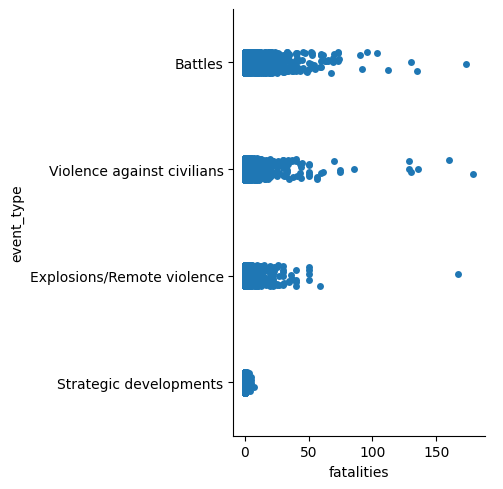

In [145]:
# Strip plot fatalities par event_type
sns.catplot( x ='fatalities',y = 'event_type', data = df)
plt.show()


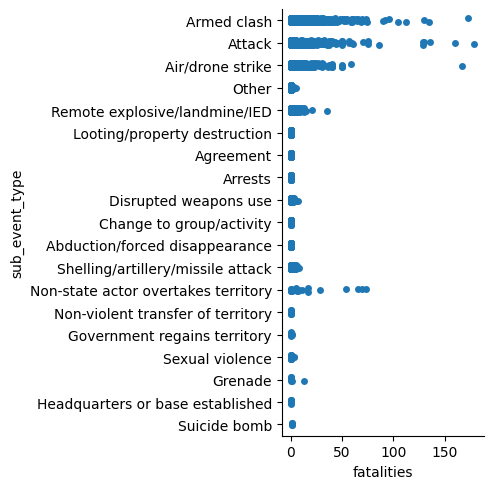

In [146]:
# Strip plot fatalities par sub_event_type
sns.catplot( x ='fatalities',y = 'sub_event_type', data = df)

plt.show()

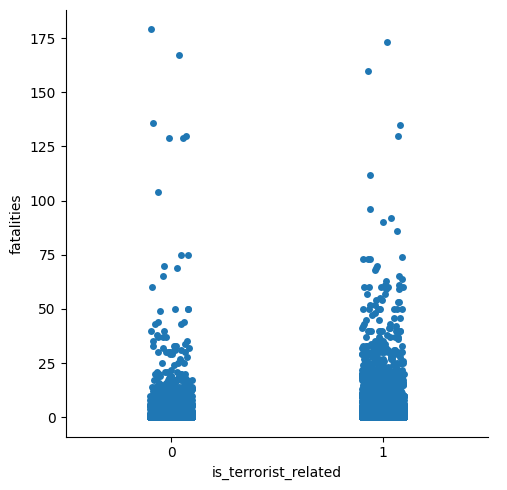

In [147]:
# Strip plot fatalities par is_terrorist_related
sns.catplot( y ='fatalities',x = 'is_terrorist_related', data = df)

plt.show()

In [148]:
# pour regarder le nombre d'√©v√©nements terroristes par mois et par r√©gion
# on fait un grouper par mois sur la colonne event_date
grouper_mois = pd.Grouper(key ='event_date', freq ='m')

/var/folders/lp/lkkw3tl55g7204wxvgdc9sn80000gp/T/ipykernel_13855/3265769814.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper_mois = pd.Grouper(key ='event_date', freq ='m')


In [149]:
# on fait la somme des √©v√©nements terroristes par r√©gion et par mois
groupby_mois_region = df.groupby([grouper_mois, df['admin1']]).agg({'is_terrorist_related': 'sum'}).unstack()
groupby_mois_region.head()


is_terrorist_related                                           \
admin1                   Agadez Bamako Boucle du Mouhoun Cascades Centre   
event_date                                                                 
2021-06-30                  0.0    NaN               4.0      6.0    NaN   
2021-07-31                  NaN    0.0               7.0      1.0    NaN   
2021-08-31                  NaN    NaN               3.0      2.0    NaN   
2021-09-30                  NaN    0.0              13.0      7.0    0.0   
2021-10-31                  NaN    NaN              20.0     23.0    NaN   

                                                                 ...        \
admin1     Centre-Est Centre-Nord Centre-Ouest Centre-Sud Diffa  ...  Nord   
event_date                                                       ...         
2021-06-30        0.0        12.0          0.0        NaN   8.0  ...  16.0   
2021-07-31        NaN        21.0          NaN        0.0  12.0  ...  26.0   
2021-08-31        1.0        24.0          NaN        0.0  13.0  ...   2.0   
2021-09-30        0.0        16.0          NaN        NaN   6.0  ...   9.0   
2021-10-31        1.0        16.0          NaN        0.0   7.0  ...  24.0   

                                                                           \
admin1     Plateau-Central Sahel Segou Sikasso Sud-Ouest Tahoua Tillaberi   
event_date                                                                  
2021-06-30             NaN  28.0   1.0     2.0       NaN    0.0       4.0   
2021-07-31             NaN  18.0  21.0     4.0       0.0    0.0       7.0   
2021-08-31             NaN  32.0  12.0     3.0       0.0    NaN       2.0   
2021-09-30             NaN  32.0  12.0     4.0       NaN    NaN       1.0   
2021-10-31             NaN  39.0  13.0     3.0       1.0    0.0       7.0   

                              
admin1     Tombouctou Zinder  
event_date                    
2021-06-30        9.0    NaN  
2021-07-31        3.0    NaN  
2021-08-31        1.0    NaN  
2021-09-30        5.0    NaN  
2021-10-31        9.0    NaN  

[5 rows x 31 columns]

In [150]:
# on remplace les NaN par 0
groupby_mois_region= groupby_mois_region.fillna(0)

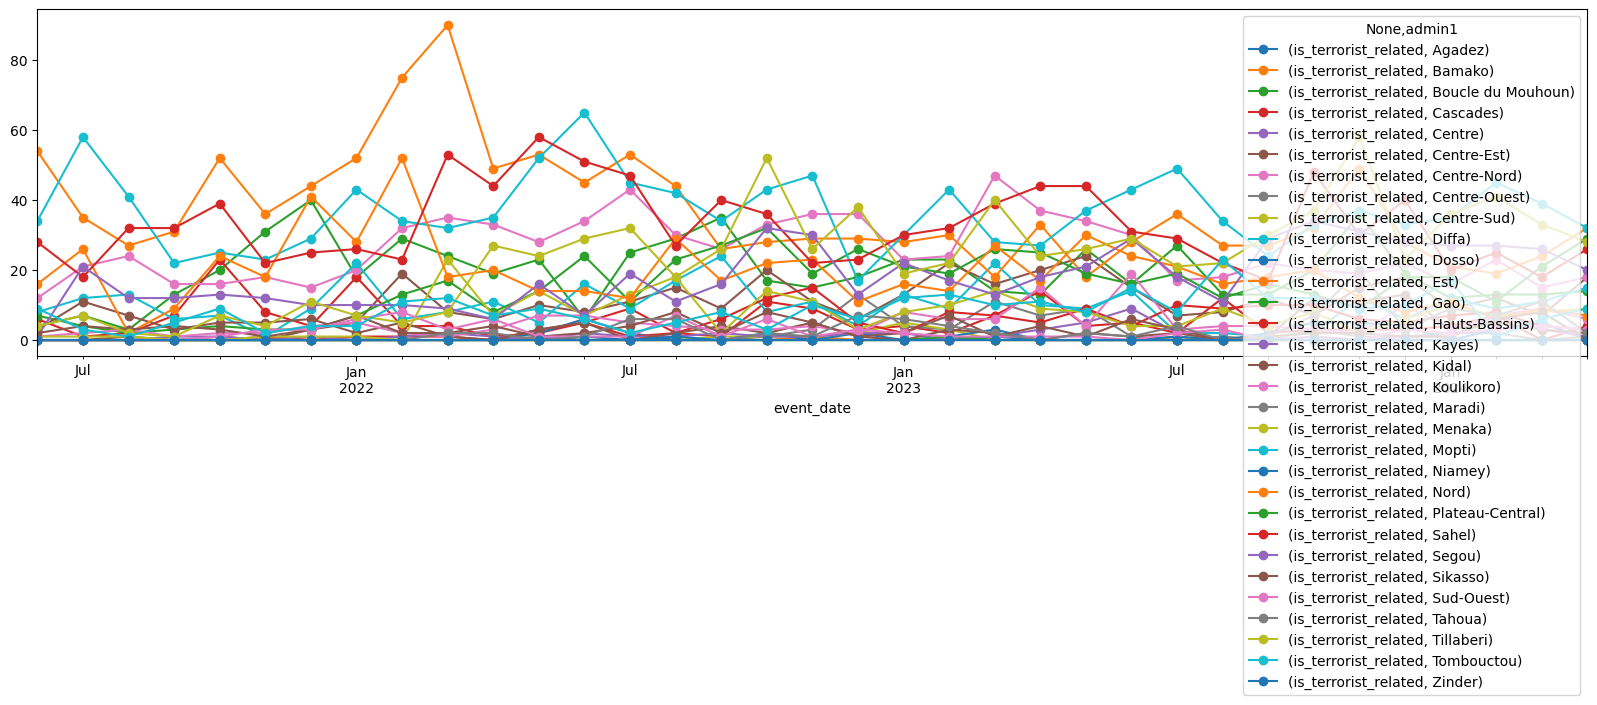

In [151]:
# trac√© du nombre d'√©v√©nements terroristes par r√©gion et par mois
groupby_mois_region.plot(figsize = (20,4.5), style ='o-');

In [152]:
# nombre d'√©v√©nements terroristes par mois et par pays
groupby_mois_pays = df.groupby([grouper_mois, df['country']]).agg({'is_terrorist_related': 'sum'}).unstack()
groupby_mois_pays.head()

is_terrorist_related           
country            Burkina Faso Mali Niger
event_date                                
2021-06-30                  120   58    12
2021-07-31                  108  104    19
2021-08-31                   91   70    15
2021-09-30                  108   51     7
2021-10-31                  176   62    14

In [153]:
# on remplace les NaN par des 0
groupby_mois_pays= groupby_mois_pays.fillna(0)

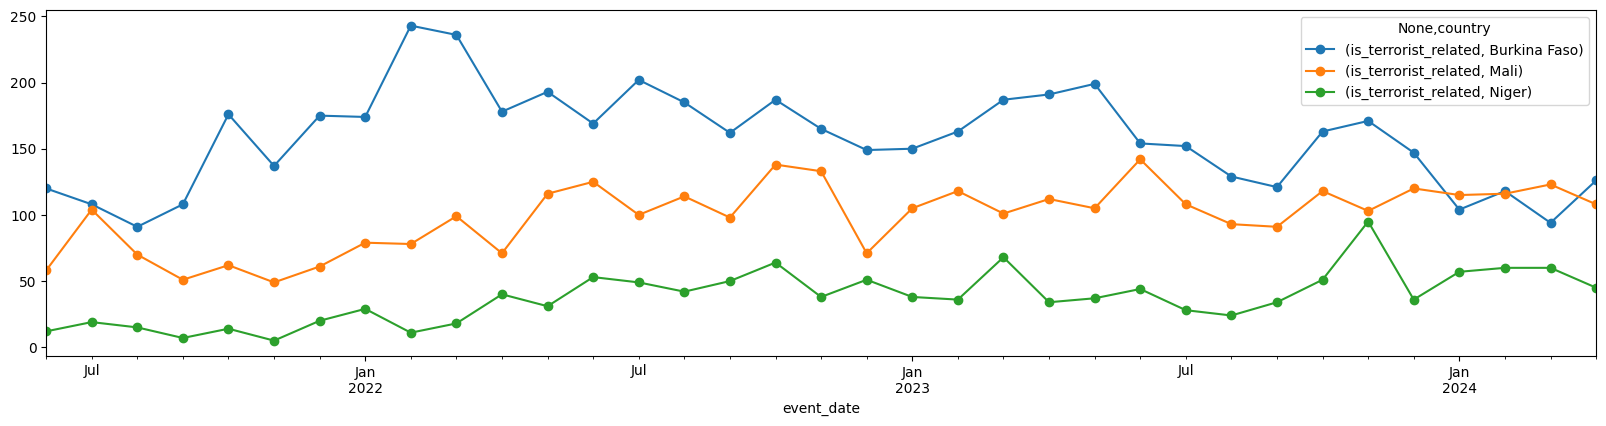

In [154]:
# on trace le nombre d'√©v√©nements terroristes par mois et par pays
groupby_mois_pays.plot(figsize = (20,4.5), style ='o-');

# on peut voir une tendence √† la baisse au Burkina Fasso et √† la hausse au Mali et au Niger

In [155]:
# Validation crois√©e entre event_type et is_terrorist_related
cross_tab= pd.crosstab(df['event_type'], df['is_terrorist_related'])
cross_tab

is_terrorist_related           0     1
event_type                            
Battles                      346  2884
Explosions/Remote violence   273  2082
Strategic developments      1251  2644
Violence against civilians  1887  2687

In [156]:
## Hypoth√®ses : 
# ùêª0 : La variable event_type est ind√©pendante du type d'√©v√®nement terroriste ou non
# H1 : La variable event_type est d√©pendante du type d'√©v√®nement terroriste ou non


## Le test chi2 d'ind√©pendance : 
from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(cross_tab)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_valeur, "\n")

# H0 rejet√© et H1 accept√©e: La variable event_type est d√©pendante du type d'√©v√®nement terroriste ou non

La statistique du test est :  1249.06184654158 
La p-valeur du test est :  1.6605255347645948e-270 



In [157]:
cross_tab2= pd.crosstab(df['sub_event_type'], df['is_terrorist_related'])
cross_tab2

is_terrorist_related                    0     1
sub_event_type                                 
Abduction/forced disappearance        363   967
Agreement                               5    38
Air/drone strike                      234   976
Armed clash                           341  2860
Arrests                                96    15
Attack                               1514  1708
Change to group/activity               72    85
Disrupted weapons use                  53   283
Government regains territory            3     5
Grenade                                 5     1
Headquarters or base established        6     0
Looting/property destruction          677  1781
Non-state actor overtakes territory     2    19
Non-violent transfer of territory      17     6
Other                                 325   436
Remote explosive/landmine/IED          27   876
Sexual violence                        10    12
Shelling/artillery/missile attack       7   225
Suicide bomb                            0     4

In [158]:
## Hypoth√®ses : 
# ùêª0 : La variable sub_event_type est ind√©pendante du type d'√©v√®nement terroriste ou non
# H1 : La variable sub_event_type est d√©pendante du type d'√©v√®nement terroriste ou non


## Le test chi2 d'ind√©pendance : 
from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(cross_tab2)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_valeur, "\n")

# p-valeur √† 0.0  H0 rejet√© et H1 accept√©e: La variable sub_event_type est d√©pendante du type d'√©v√®nement terroriste ou non

La statistique du test est :  1876.7775600220853 
La p-valeur du test est :  0.0 



In [159]:
# regarder les donn√©es par semaine par pays
# grouper par semaine
grouper_sem = pd.Grouper(key ='event_date', freq = 'w' )

/var/folders/lp/lkkw3tl55g7204wxvgdc9sn80000gp/T/ipykernel_13855/269145671.py:3: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  grouper_sem = pd.Grouper(key ='event_date', freq = 'w' )


In [160]:
# grouper par semaine et par pays
groupby_sem_pays = df.groupby([grouper_sem, df['country']]).agg({'is_terrorist_related': 'sum'}).unstack()
groupby_sem_pays.head()

is_terrorist_related           
country            Burkina Faso Mali Niger
event_date                                
2021-06-06                   19    7     5
2021-06-13                   34   17     2
2021-06-20                   35    8     0
2021-06-27                   21   17     2
2021-07-04                   22   27     5

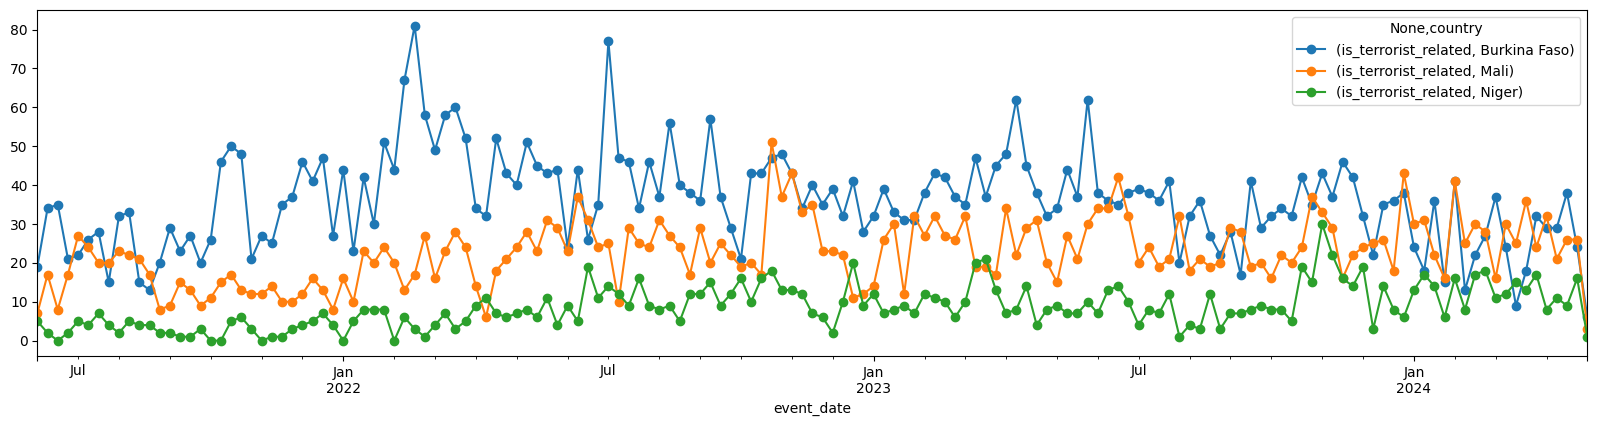

In [161]:
# tracer les courbes par semaines et par pays
groupby_sem_pays.plot(figsize = (20,4.5), style ='o-');

In [162]:
# refait la m√™me chose par jour
grouper_jour = pd.Grouper(key ='event_date', freq = 'd' )
groupby_jour_pays = df.groupby([grouper_jour, df['country']]).agg({'is_terrorist_related': 'sum'}).unstack()
groupby_jour_pays.head()

is_terrorist_related           
country            Burkina Faso Mali Niger
event_date                                
2021-06-01                  2.0  2.0   NaN
2021-06-02                  3.0  0.0   0.0
2021-06-03                  3.0  2.0   0.0
2021-06-04                  3.0  1.0   1.0
2021-06-05                  7.0  1.0   1.0

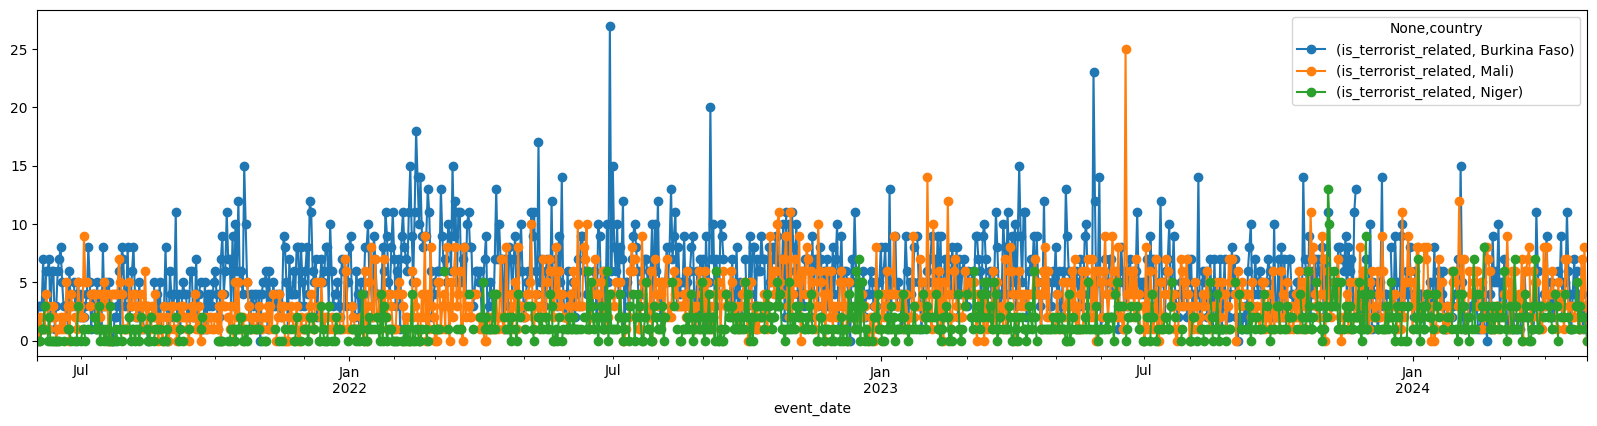

In [163]:
# tracer du nombre d'√©v√©nements terroristes par jour et par pays
groupby_jour_pays.plot(figsize = (20,4.5), style ='o-');

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14054 entries, BFO11896 to MLI5182
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   event_date            14054 non-null  datetime64[ns]
 1   year                  14054 non-null  int64         
 2   time_precision        14054 non-null  int64         
 3   month                 14054 non-null  int32         
 4   disorder_type         14054 non-null  object        
 5   event_type            14054 non-null  object        
 6   sub_event_type        14054 non-null  object        
 7   actor1                14054 non-null  object        
 8   assoc_actor_1         1625 non-null   object        
 9   inter1                14054 non-null  int64         
 10  actor2                13362 non-null  object        
 11  assoc_actor_2         4301 non-null   object        
 12  inter2                14054 non-null  int64         
 13  interaction 

In [99]:
############################################################
## SUPPRESSION DES COLONNES

# On supprime les colonnes qui ne nous serons d'aucune utilit√©
columns_to_drop = [
    'time_precision',
    'admin2',
    'admin3',
    'iso',
    'region',
    'location',
    'latitude',
    'longitude',
    'geo_precision',
    'source',
    'source_scale',
    'notes',
    'tags',
    'timestamp',
    'civilian_targeting',
    'inter1',
    'inter2',
    'interaction',
    'event_date'

]

df = df.drop(columns=columns_to_drop, axis=1)



In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14054 entries, BFO11896 to MLI5182
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  14054 non-null  int64 
 1   month                 14054 non-null  int32 
 2   disorder_type         14054 non-null  object
 3   event_type            14054 non-null  object
 4   sub_event_type        14054 non-null  object
 5   actor1                14054 non-null  object
 6   assoc_actor_1         1625 non-null   object
 7   actor2                13362 non-null  object
 8   assoc_actor_2         4301 non-null   object
 9   is_terrorist_related  14054 non-null  int64 
 10  is_pmc_related        14054 non-null  int64 
 11  country               14054 non-null  object
 12  admin1                14054 non-null  object
 13  fatalities            14054 non-null  int64 
dtypes: int32(1), int64(4), object(9)
memory usage: 1.6+ MB


In [101]:
# s√©paration des data et de la target
data = df.drop('is_terrorist_related', axis=1)
target= df['is_terrorist_related']

In [114]:
# On dichotomise les variables qui sont de type cat√©gorielle ( si on le fait apr√®s le train test split: message d'erreur)
categorical_features = ['disorder_type','event_type','sub_event_type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2', 'country','admin1' ]
data_encoded = pd.get_dummies(data, columns=categorical_features, dtype=int)

In [115]:
data_encoded.head()

year  month  is_pmc_related  fatalities  \
event_id_cnty                                            
BFO11896       2024      4               0           4   
BFO11897       2024      4               0          11   
BFO11898       2024      4               0          10   
MLI32402       2024      4               0           4   
NIR30820       2024      4               0           1   

               disorder_type_Political violence  \
event_id_cnty                                     
BFO11896                                      1   
BFO11897                                      1   
BFO11898                                      1   
MLI32402                                      1   
NIR30820                                      1   

               disorder_type_Strategic developments  event_type_Battles  \
event_id_cnty                                                             
BFO11896                                          0                   1   
BFO11897                                          0                   1   
BFO11898                                          0                   1   
MLI32402                                          0                   0   
NIR30820                                          0                   0   

               event_type_Explosions/Remote violence  \
event_id_cnty                                          
BFO11896                                           0   
BFO11897                                           0   
BFO11898                                           0   
MLI32402                                           0   
NIR30820                                           0   

               event_type_Strategic developments  \
event_id_cnty                                      
BFO11896                                       0   
BFO11897                                       0   
BFO11898                                       0   
MLI32402                                       0   
NIR30820                                       0   

               event_type_Violence against civilians  ...  admin1_Nord  \
event_id_cnty                                         ...                
BFO11896                                           0  ...            0   
BFO11897                                           0  ...            0   
BFO11898                                           0  ...            0   
MLI32402                                           1  ...            0   
NIR30820                                           1  ...            0   

               admin1_Plateau-Central  admin1_Sahel  admin1_Segou  \
event_id_cnty                                                       
BFO11896                            0             0             0   
BFO11897                            0             0             0   
BFO11898                            0             0             0   
MLI32402                            0             0             0   
NIR30820                            0             0             0   

               admin1_Sikasso  admin1_Sud-Ouest  admin1_Tahoua  \
event_id_cnty                                                    
BFO11896                    0                 1              0   
BFO11897                    0                 0              0   
BFO11898                    0                 0              0   
MLI32402                    0                 0              0   
NIR30820                    0                 0              0   

               admin1_Tillaberi  admin1_Tombouctou  admin1_Zinder  
event_id_cnty                                                      
BFO11896                      0                  0              0  
BFO11897                      0                  0              0  
BFO11898                      0                  0              0  
MLI32402                      0                  0              0  
NIR30820                      0                  0              0  

[5 rows x 1158 columns]

In [116]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14054 entries, BFO11896 to MLI5182
Columns: 1158 entries, year to admin1_Zinder
dtypes: int32(1), int64(1157)
memory usage: 124.7+ MB


In [117]:
#1er d√©coupage des donn√©es en respectant la chronologie. X_test1 y_test1 simuleront les donn√©es du futur
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_encoded, target, test_size=0.2, random_state=123, shuffle = False)

In [118]:
#2eme d√©coupage des donn√©es en respectant la chronologie. On va √©valuer le mod√®le en faisant un nouveau d√©coupage de X_train1, y_train1
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=123, shuffle = False)

In [119]:
X_train2.head()

year  month  is_pmc_related  fatalities  \
event_id_cnty                                            
BFO11896       2024      4               0           4   
BFO11897       2024      4               0          11   
BFO11898       2024      4               0          10   
MLI32402       2024      4               0           4   
NIR30820       2024      4               0           1   

               disorder_type_Political violence  \
event_id_cnty                                     
BFO11896                                      1   
BFO11897                                      1   
BFO11898                                      1   
MLI32402                                      1   
NIR30820                                      1   

               disorder_type_Strategic developments  event_type_Battles  \
event_id_cnty                                                             
BFO11896                                          0                   1   
BFO11897                                          0                   1   
BFO11898                                          0                   1   
MLI32402                                          0                   0   
NIR30820                                          0                   0   

               event_type_Explosions/Remote violence  \
event_id_cnty                                          
BFO11896                                           0   
BFO11897                                           0   
BFO11898                                           0   
MLI32402                                           0   
NIR30820                                           0   

               event_type_Strategic developments  \
event_id_cnty                                      
BFO11896                                       0   
BFO11897                                       0   
BFO11898                                       0   
MLI32402                                       0   
NIR30820                                       0   

               event_type_Violence against civilians  ...  admin1_Nord  \
event_id_cnty                                         ...                
BFO11896                                           0  ...            0   
BFO11897                                           0  ...            0   
BFO11898                                           0  ...            0   
MLI32402                                           1  ...            0   
NIR30820                                           1  ...            0   

               admin1_Plateau-Central  admin1_Sahel  admin1_Segou  \
event_id_cnty                                                       
BFO11896                            0             0             0   
BFO11897                            0             0             0   
BFO11898                            0             0             0   
MLI32402                            0             0             0   
NIR30820                            0             0             0   

               admin1_Sikasso  admin1_Sud-Ouest  admin1_Tahoua  \
event_id_cnty                                                    
BFO11896                    0                 1              0   
BFO11897                    0                 0              0   
BFO11898                    0                 0              0   
MLI32402                    0                 0              0   
NIR30820                    0                 0              0   

               admin1_Tillaberi  admin1_Tombouctou  admin1_Zinder  
event_id_cnty                                                      
BFO11896                      0                  0              0  
BFO11897                      0                  0              0  
BFO11898                      0                  0              0  
MLI32402                      0                  0              0  
NIR30820                      0                  0              0  

[5 rows x 1158 columns]

In [122]:
# insatntiation de l'arbre de d√©cision
dt_clf = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=123)
# entrainement sur X_train2 y_train2
dt_clf.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [124]:
y_pred2 = dt_clf.predict(X_test2)
pd.crosstab(y_test2, y_pred2, rownames=['Classe r√©elle'], colnames=['Classe pr√©dite'])

Classe pr√©dite    0     1
Classe r√©elle            
0               440     0
1               109  1700

In [140]:
print('Score entrainement 2:', dt_clf.score(X_train2, y_train2))
print('Score de test 2:', dt_clf.score(X_test2, y_test2))

Score entrainement 2: 0.9599733155436958
Score de test 2: 0.9515340151178302


In [125]:
feats = {}
for feature, importance in zip(X_train1.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

#Affichage des 8 variables les plus importantes
importances.sort_values(by='Importance', ascending=False).head(8)

Importance
actor1_JNIM: Group for Support of Islam and Mus...    0.384340
actor2_JNIM: Group for Support of Islam and Mus...    0.305409
actor1_Islamic State (Sahel)                          0.209116
actor2_Islamic State (Sahel)                          0.101135
assoc_actor_2_Katiba Serma; JNIM: Group for Sup...    0.000000
assoc_actor_2_Idourfane Ethnic Group (Mali)           0.000000
assoc_actor_2_Islamic State (Sahel)                   0.000000
assoc_actor_2_Inates Communal Group (Niger)           0.000000

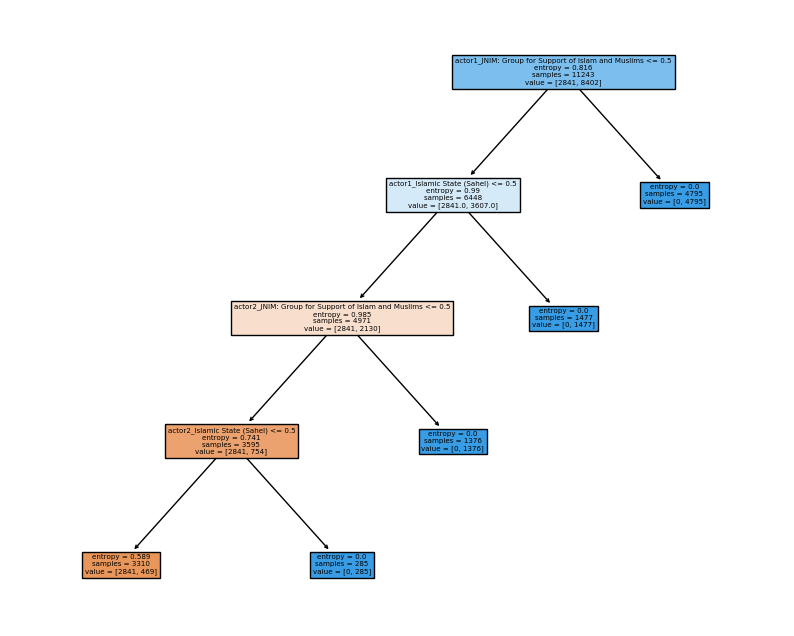

In [164]:
from sklearn import tree

plt.figure(figsize=(10,8))
tree.plot_tree(dt_clf, feature_names = X_train2.columns.tolist(), filled=True);

In [129]:
dt_clf.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [130]:
y_pred1 = dt_clf.predict(X_test1)

In [131]:
pd.crosstab(y_test1, y_pred1, rownames=['Classe r√©elle'], colnames=['Classe pr√©dite'])

Classe pr√©dite    0     1
Classe r√©elle            
0               916     0
1               609  1286

In [141]:
print('Score entrainement 1:', dt_clf.score(X_train1, y_train1))
print('Score de test 1:', dt_clf.score(X_test1, y_test1))

Score entrainement 1: 0.9582851552076848
Score de test 1: 0.7833511205976521


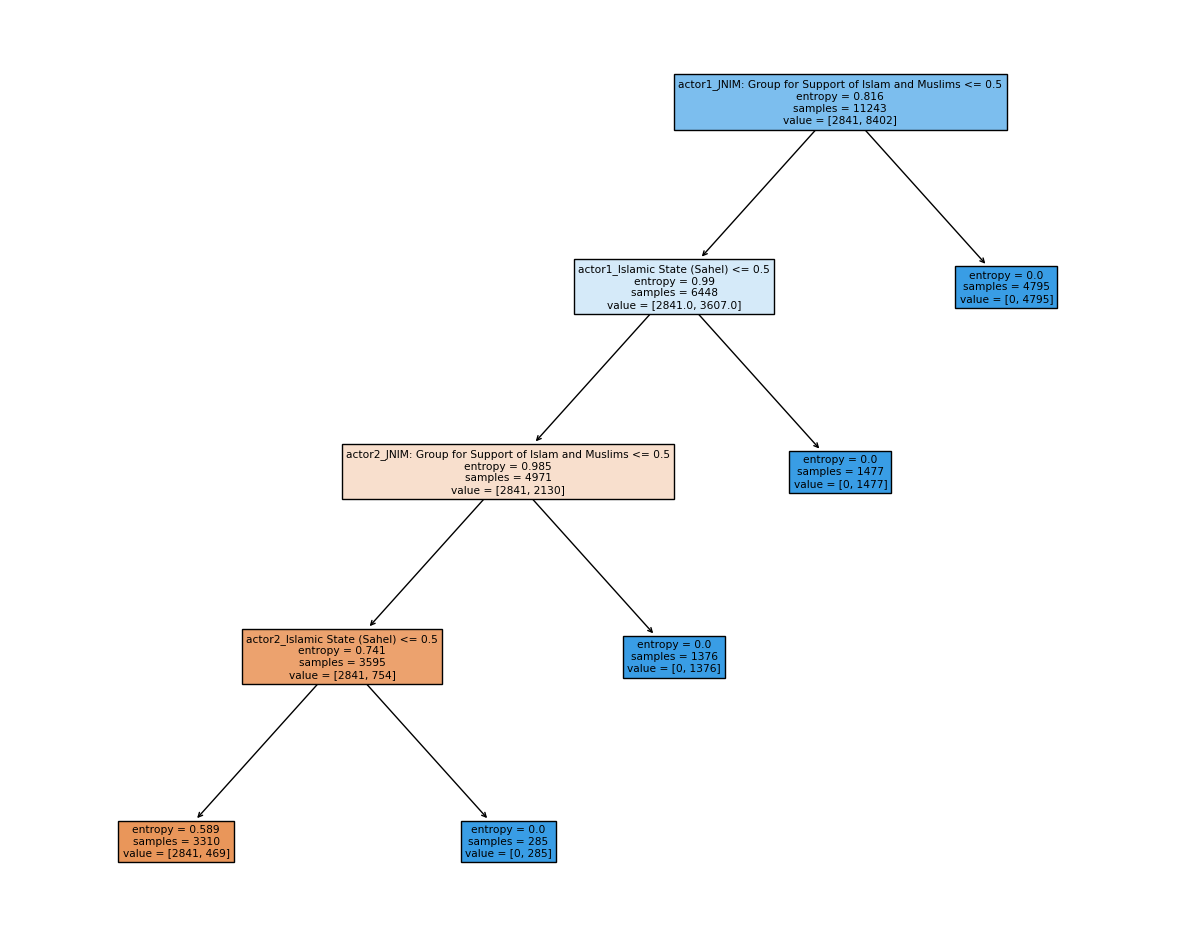

In [132]:
plt.figure(figsize=(15,12))
tree.plot_tree(dt_clf, feature_names = X_train1.columns.tolist(), filled=True);

In [134]:
dt_clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=321)
dt_clf_gini.fit(X_train2, y_train2)
y_pred2 = dt_clf_gini.predict(X_test2)
pd.crosstab(y_test2, y_pred2, rownames=['Classe r√©elle'], colnames=['Classe pr√©dite'])


Classe pr√©dite    0     1
Classe r√©elle            
0               440     0
1               109  1700

In [136]:
dt_clf_gini.score(X_test2, y_test2)

0.9515340151178302